In [76]:
# Step 1: Define the objective of problem statement
# create a classification model which can classify getting admission or not 
# step 2: Data Gathering
# step 3: Data preperation

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# import lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [79]:
# Read data set
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Admission_Predict.csv")

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [80]:
#step 3: data prep
# not required tothis data set

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Serial No.             400 non-null    int64  
 1   GRE Score              400 non-null    int64  
 2   TOEFL Score            400 non-null    int64  
 3   University Rating      400 non-null    int64  
 4   SOP                    400 non-null    float64
 5   LOR                    400 non-null    float64
 6   CGPA                   400 non-null    float64
 7   Research               400 non-null    int64  
 8   Probability of Admit   400 non-null    float64
 9   Admit                  400 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 31.4 KB


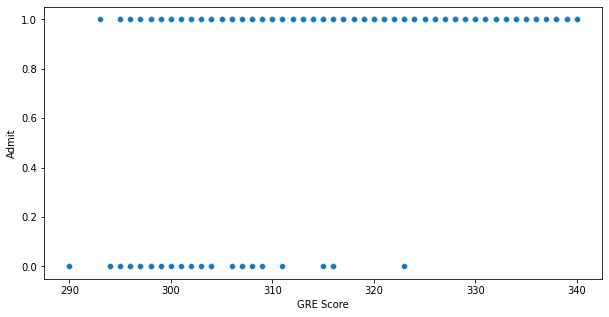

In [82]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['GRE Score'],y=df['Admit'])

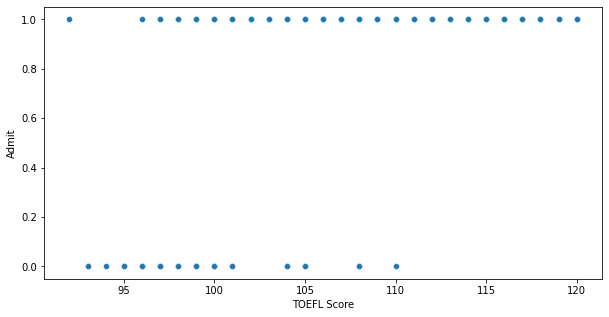

In [83]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['TOEFL Score'],y=df['Admit'])

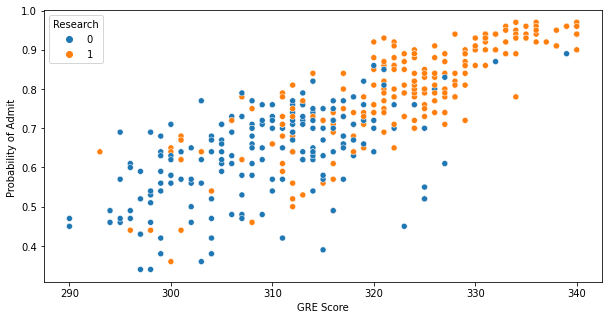

In [84]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['GRE Score'],y=df['Probability of Admit '],hue=df['Research'])

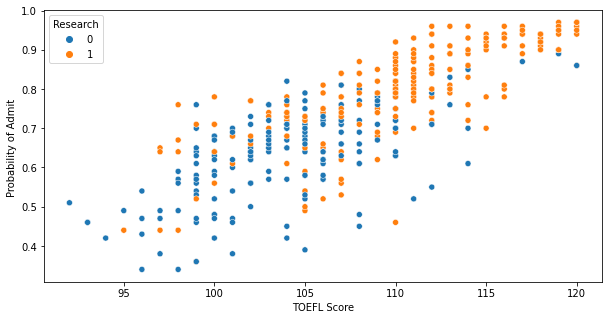

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['TOEFL Score'],y=df['Probability of Admit '],hue=df['Research'])

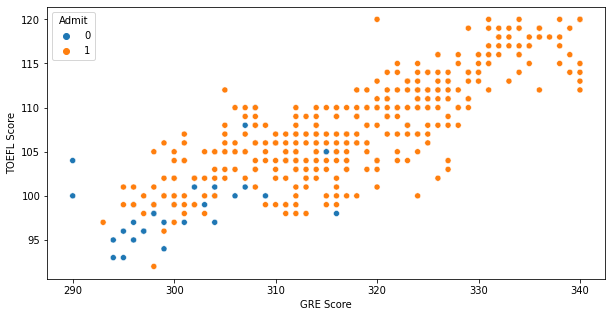

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['GRE Score'],y=df['TOEFL Score'],hue=df['Admit'])

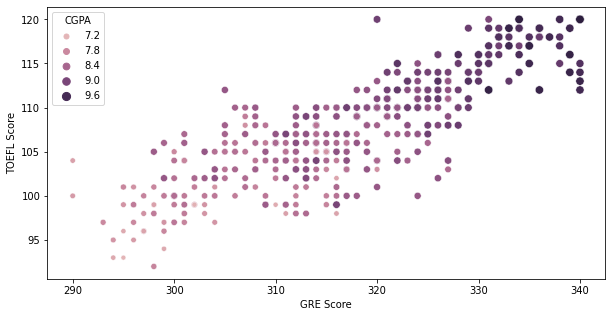

In [87]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['GRE Score'],y=df['TOEFL Score'],hue=df['CGPA'],size=df['CGPA'])

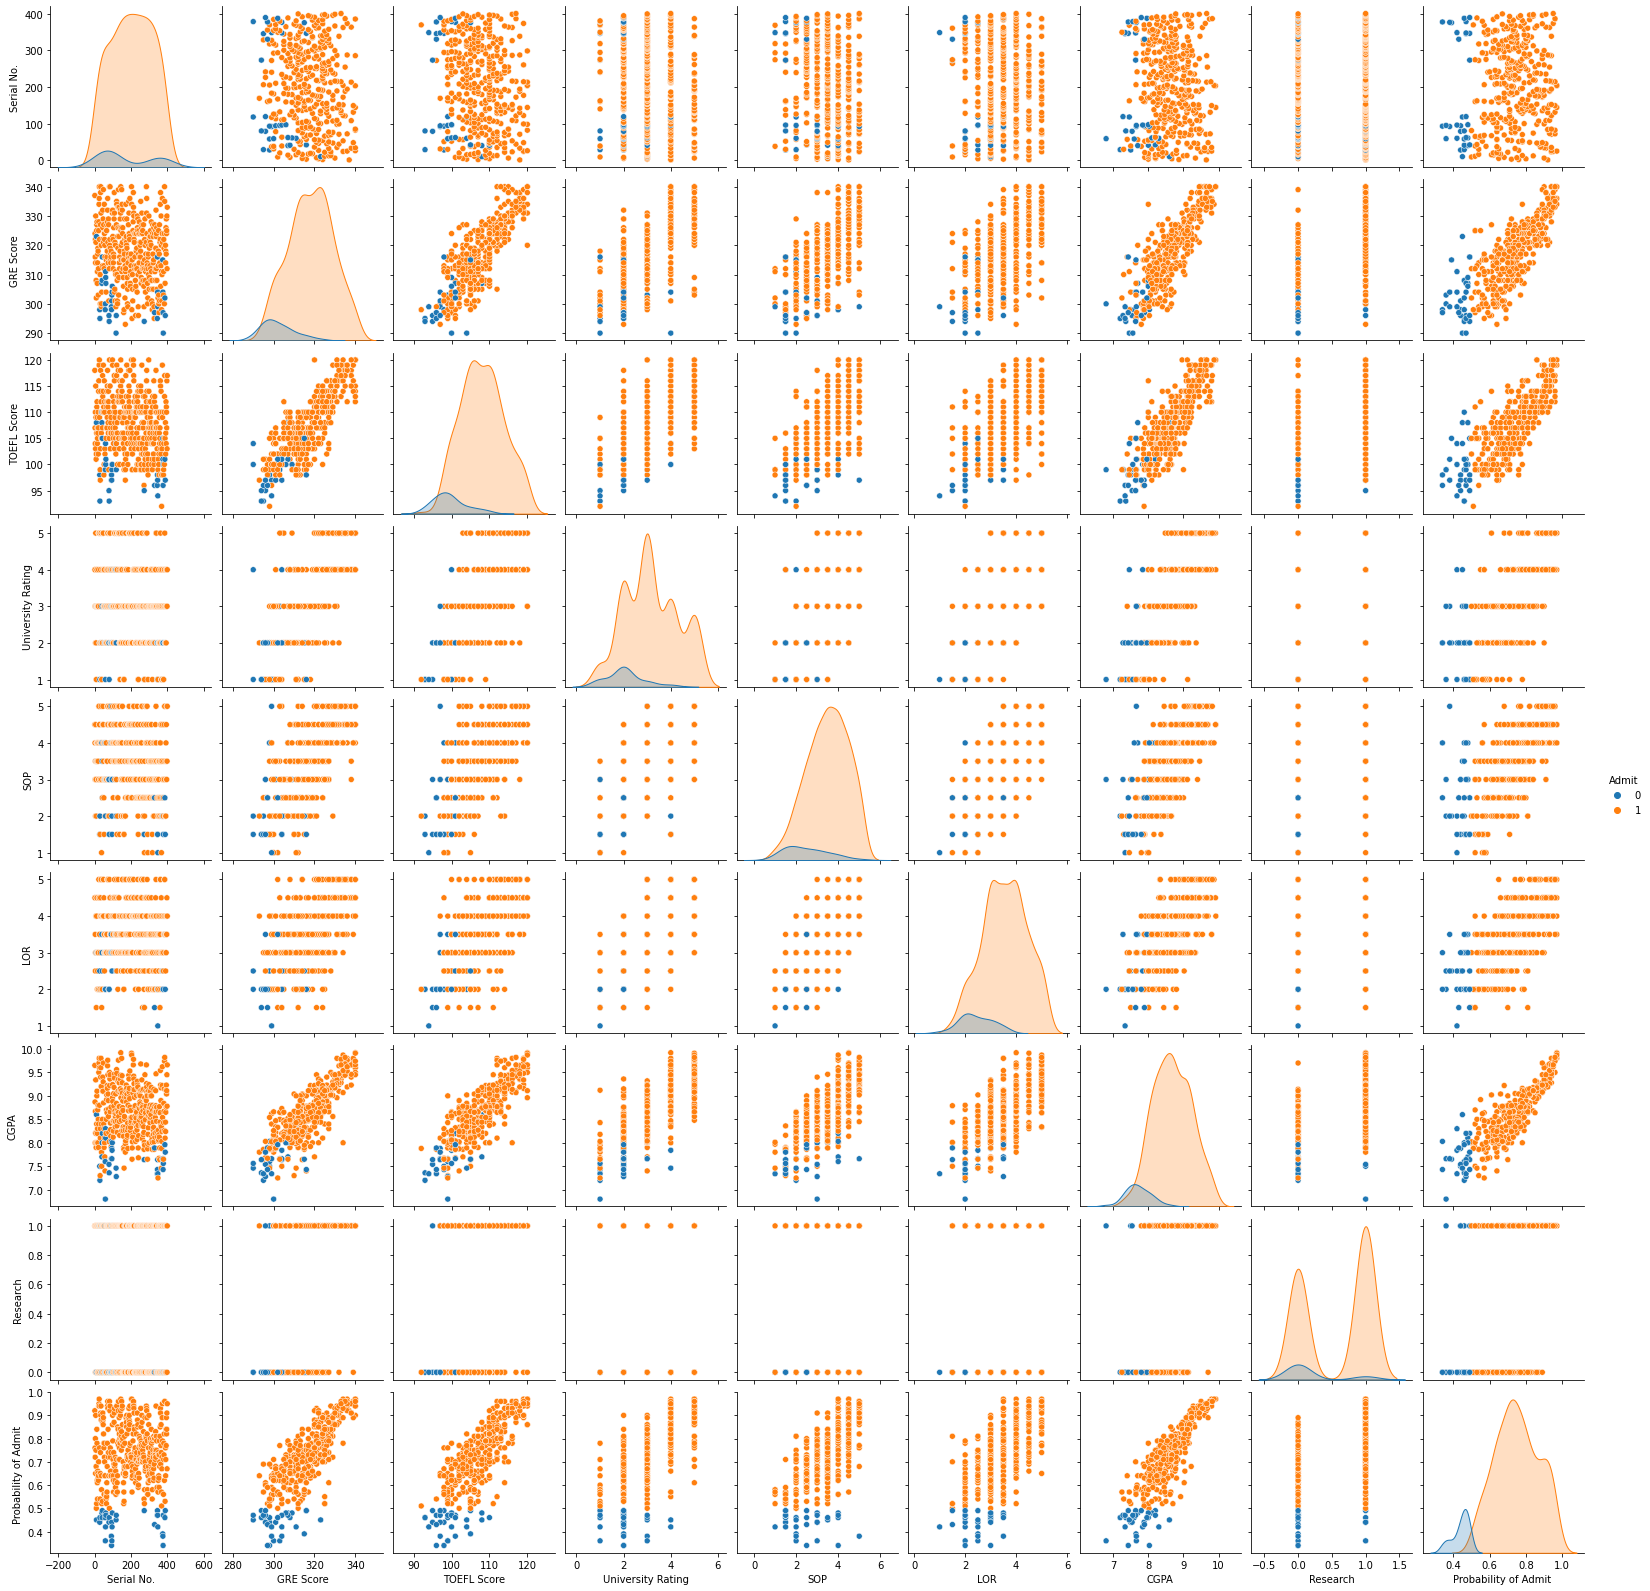

In [88]:
sns.pairplot(df,hue='Admit')

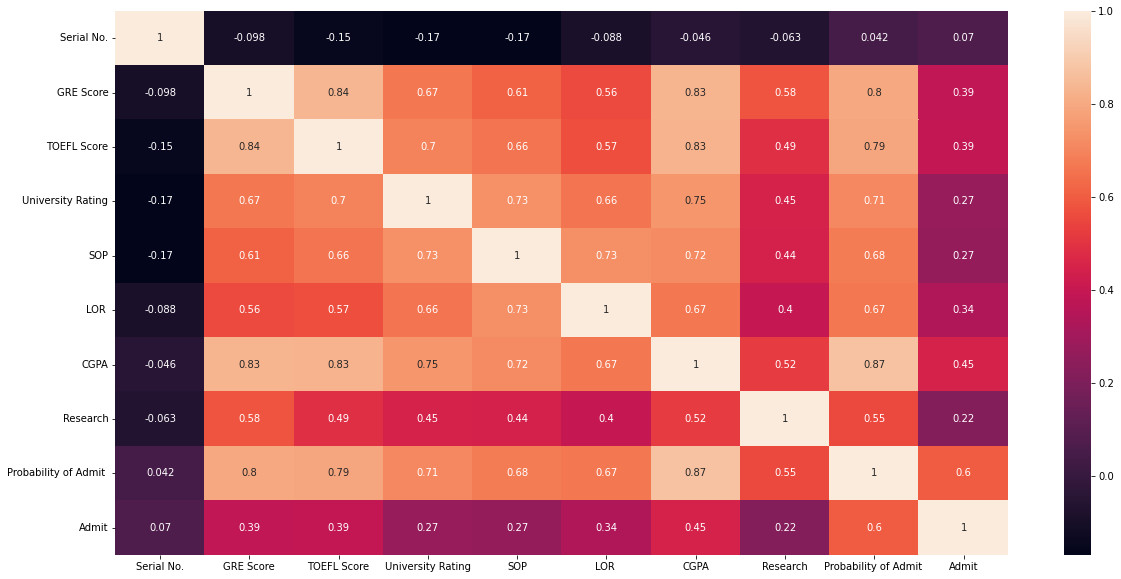

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [90]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Probability of Admit ', 'Admit'],
      dtype='object')

In [91]:
 # split data into X and y
# X=age
# y=bought_insurance

In [92]:
X=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ', 'CGPA', 'Research']]
y=df['Admit']

In [93]:
# split the data into traning and spliting
# train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [94]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (320, 7)
X_test:  (80, 7)
y_train:  (320,)
y_test:  (80,)


In [95]:
# model evaluation fun

from sklearn.metrics import precision_score,recall_score,f1_score

def model_Eval(y_test,y_pred):
    acc=accuracy_score(y_test,y_pred)
    print("Accuracy:- ",acc)
    print("Error Rate:- ",1-acc)
    print("Precision :-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1:- ",f1_score(y_test,y_pred,average='weighted'))

    # confusion matrics
    from sklearn.metrics import confusion_matrix
    
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True)
    plt.xlabel("prediction")
    plt.ylabel("Actual")

# Step 5 : Building machine Learning Model

model completed
Model training completed
y_pred completed
Acc of k=3 :-   95.0
Accuracy:-  0.95
Error Rate:-  0.050000000000000044
Precision :- 0.9447368421052632
Recall:-  0.95
F1:-  0.9453333333333331
[[ 3  3]
 [ 1 73]]


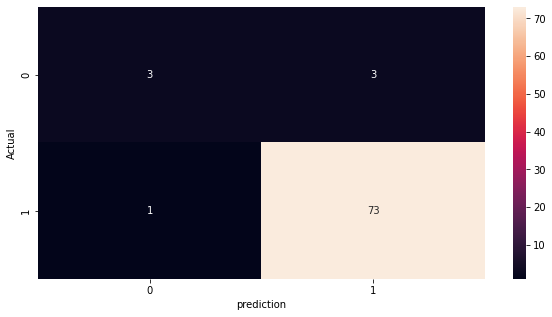

In [96]:
# Knn model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ML_Model=KNeighborsClassifier(n_neighbors=3,p=1)
print("model completed")

# traning
ML_Model.fit(X_train,y_train)
print("Model training completed")

# find y_pred

y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# find acc
acc=accuracy_score(y_test,y_pred)
print("Acc of k=3 :-  ",acc*100)

#KNN Eval
model_Eval(y_test,y_pred)

In [97]:
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1]


model completed
Model traning completed
y_pred completed
Accuracy:-  0.8875
Error Rate:-  0.11250000000000004
Precision :- 0.8783333333333333
Recall:-  0.8875
F1:-  0.8827638804148872
[[ 1  5]
 [ 4 70]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


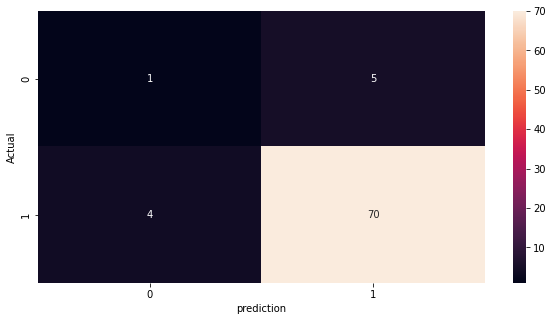

In [63]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)

model completed
traning completed
y_pred completed
Accuracy:-  0.8875
Error Rate:-  0.11250000000000004
Precision :- 0.9254611330698287
Recall:-  0.8875
F1:-  0.9020773344302755
[[ 4  2]
 [ 7 67]]


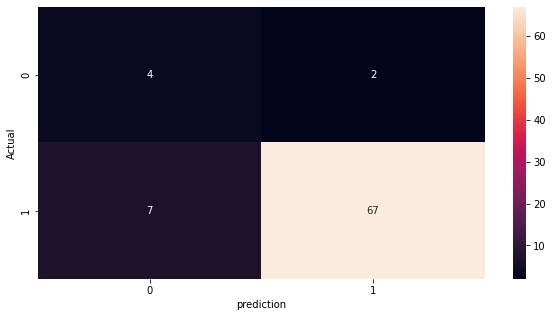

In [64]:
# NB
from sklearn.naive_bayes import GaussianNB

ML_Model=GaussianNB()
print("model completed")

#traning
ML_Model.fit(X_train,y_train)
print("traning completed")

# y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# Eval
model_Eval(y_test,y_pred)

In [65]:
# create a Model of Lin Reg
from sklearn.linear_model import LinearRegression
from sklearn import metrics
ML_Model=LinearRegression()
print("Model created")

# model traning
ML_Model.fit(X_train,y_train)
print("Traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print('y_pred completed')

# find acc
acc=ML_Model.score(X_test,y_test)
print("Acc for lin reg is :-",acc*100)

Model created
Traning completed
y_pred completed
Acc for lin reg is :- 21.193540066767458


In [66]:
#MAE
MAE=metrics.mean_absolute_error(y_test,y_pred)
print("MAE:- ",MAE)
# MSE
MSE=metrics.mean_squared_error(y_test,y_pred)
print("MSE:- ",MSE)
#RMSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE:- ",RMSE)
#RMSLE
RMSLE=np.sqrt(metrics.mean_squared_log_error(y_test,y_pred))
print("RMSLE:- ",RMSLE)

MAE:-  0.15064404418443708
MSE:-  0.054671981578680084
RMSE:-  0.2338204045387829
RMSLE:-  0.1615330289191131


In [67]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Probability of Admit ', 'Admit'],
      dtype='object')

# using minmaxscaler

In [68]:
from sklearn.preprocessing import MinMaxScaler

# Model creation
Scaler_GRE_Score=MinMaxScaler()
Scaler_TOEFL_Score=MinMaxScaler()
Scaler_University_Rating=MinMaxScaler()
Scaler_SOP=MinMaxScaler()
Scaler_LOR=MinMaxScaler()
Scaler_CGPA=MinMaxScaler()
Scaler_Research=MinMaxScaler()
Scaler_Admit=MinMaxScaler()

# Model Train
Scaler_GRE_Score.fit(df[['GRE Score']])
Scaler_TOEFL_Score.fit(df[['TOEFL Score']])
Scaler_University_Rating.fit(df[['University Rating']])
Scaler_SOP.fit(df[['SOP']])
Scaler_LOR.fit(df[['LOR ']])
Scaler_CGPA.fit(df[['CGPA']])
Scaler_Research.fit(df[['Research']])
Scaler_Admit.fit(df[['Admit']])

# Transform the values
df['Scaled_GRE Score']=Scaler_GRE_Score.transform(df[['GRE Score']])
df['Scaled_TOEFL Score']=Scaler_TOEFL_Score.transform(df[['TOEFL Score']])
df['Scaled_University Rating']=Scaler_University_Rating.transform(df[['University Rating']])
df['Scaled_SOP']=Scaler_SOP.transform(df[['SOP']])
df['Scaled_LOR']=Scaler_LOR.transform(df[['LOR ']])
df['Scaled_CGPA']=Scaler_CGPA.transform(df[['CGPA']])
df['Scaled_Research']=Scaler_Research.transform(df[['Research']])
df['Scaled_Admit']=Scaler_Research.transform(df[['Admit']])

print("------------------------Transformed Data----------------------------------")
df.head()

------------------------Transformed Data----------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Admit
Feature names seen at fit time, yet now missing:
- Research

  warnings.warn(message, FutureWarning)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability of Admit,Admit,Scaled_GRE Score,Scaled_TOEFL Score,Scaled_University Rating,Scaled_SOP,Scaled_LOR,Scaled_CGPA,Scaled_Research,Scaled_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,1.0


In [69]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Probability of Admit ', 'Admit',
       'Scaled_GRE Score', 'Scaled_TOEFL Score', 'Scaled_University Rating',
       'Scaled_SOP', 'Scaled_LOR', 'Scaled_CGPA', 'Scaled_Research',
       'Scaled_Admit'],
      dtype='object')

In [70]:
X=df[['Scaled_GRE Score','Scaled_TOEFL Score','Scaled_University Rating','Scaled_SOP','Scaled_LOR', 'Scaled_CGPA', 'Scaled_Research']]
y=df['Scaled_Admit']

In [71]:
# split the data into traning and spliting
# train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [72]:
X.columns

Index(['Scaled_GRE Score', 'Scaled_TOEFL Score', 'Scaled_University Rating',
       'Scaled_SOP', 'Scaled_LOR', 'Scaled_CGPA', 'Scaled_Research'],
      dtype='object')

In [73]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (320, 7)
X_test:  (80, 7)
y_train:  (320,)
y_test:  (80,)


In [74]:
# create a Model of Lin Reg after scaldown
from sklearn.linear_model import LinearRegression
from sklearn import metrics
ML_Model=LinearRegression()
print("Model created")

# model traning
ML_Model.fit(X_train,y_train)
print("Traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print('y_pred completed')

# find acc
acc=ML_Model.score(X_test,y_test)
print("Acc for lin reg is :-",acc*100)

Model created
Traning completed
y_pred completed
Acc for lin reg is :- 21.193540066767458


In [75]:
#MAE
MAE=metrics.mean_absolute_error(y_test,y_pred)
print("MAE:- ",MAE)
# MSE
MSE=metrics.mean_squared_error(y_test,y_pred)
print("MSE:- ",MSE)
#RMSE
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE:- ",RMSE)
#RMSLE
RMSLE=np.sqrt(metrics.mean_squared_log_error(y_test,y_pred))
print("RMSLE:- ",RMSLE)

MAE:-  0.1506440441844371
MSE:-  0.054671981578680084
RMSE:-  0.2338204045387829
RMSLE:-  0.1615330289191131


model completed
Model traning completed
y_pred completed
Accuracy:-  0.9375
Error Rate:-  0.0625
Precision :- 0.9414556962025316
Recall:-  0.9375
F1:-  0.9161998132586365
[[ 1  5]
 [ 0 74]]


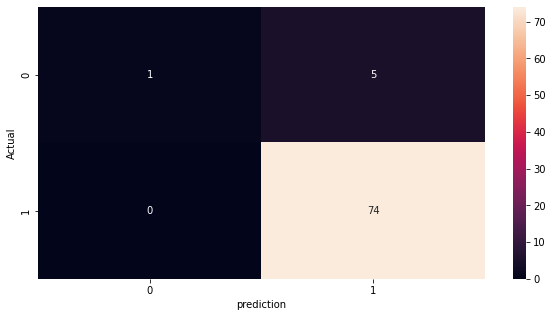

In [35]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)

In [36]:
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


# Step 7 : prediction